In [7]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../01-ml_introduction/car_fuel_efficiency.csv')


In [8]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [9]:
# Select only the required columns
columns_to_use = [
    'engine_displacement',
    'horsepower', 
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

# Create a new dataframe with only these columns
df_selected = df[columns_to_use]

# Display the prepared dataset
print("Selected dataset shape:", df_selected.shape)
print("\nColumns:", df_selected.columns.tolist())


Selected dataset shape: (9704, 5)

Columns: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']


In [10]:
df_selected.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [11]:
# Basic statistics for fuel_efficiency_mpg
print("Fuel Efficiency MPG Statistics:")
print(df['fuel_efficiency_mpg'].describe())

Fuel Efficiency MPG Statistics:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


In [12]:
# Check for skewness
from scipy.stats import skew
skewness = skew(df['fuel_efficiency_mpg'])
print(f"\nSkewness: {skewness:.3f}")
print("Interpretation: Skewness > 1 indicates a long right tail")


Skewness: -0.012
Interpretation: Skewness > 1 indicates a long right tail


Text(0, 0.5, 'Frequency')

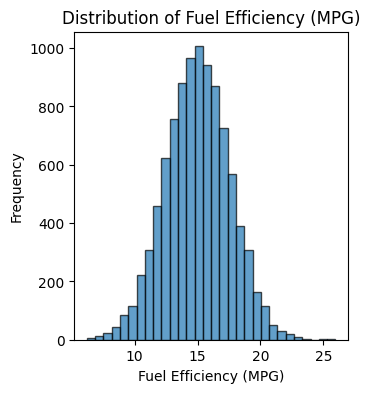

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['fuel_efficiency_mpg'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fuel Efficiency (MPG)')

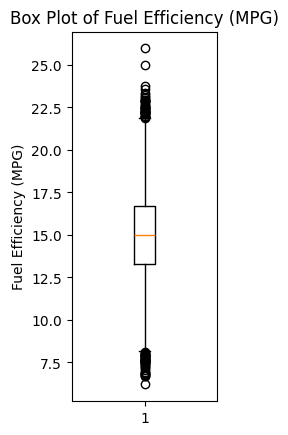

In [15]:
# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(df['fuel_efficiency_mpg'])
plt.title('Box Plot of Fuel Efficiency (MPG)')
plt.ylabel('Fuel Efficiency (MPG)')

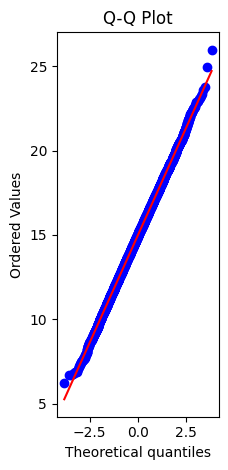

In [16]:
# Q-Q plot to check normality
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(df['fuel_efficiency_mpg'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Question 1
There's one column with missing values. What is it?

In [18]:
# Check for missing values in each column
print("Missing values per column:")
missing_values = df_selected.isnull().sum()
print(missing_values)

Missing values per column:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


# Question 2.
Median for horse power

In [19]:
# Calculate median for horsepower 
horsepower_median = df_selected['horsepower'].median()
print(f"Median horsepower: {horsepower_median}")

Median horsepower: 149.0


# Question 3. Filling NAs

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Approach 1: Fill missing horsepower with 0
df_zero = df_selected.copy()
df_zero['horsepower'].fillna(0, inplace=True)

# Approach 2: Fill missing horsepower with mean
df_mean = df_selected.copy()
hp_mean = df_selected['horsepower'].mean()
df_mean['horsepower'].fillna(hp_mean, inplace=True)

print(f"\nMean horsepower value: {hp_mean:.1f}")

#  test both with a simple model
def test_approach(data, name):
    X = data[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
    y = data['fuel_efficiency_mpg']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name}: RMSE = {rmse:.4f}")
    return rmse

print("\nTesting both approaches:")
rmse_zero = test_approach(df_zero, "Fill with 0")
rmse_mean = test_approach(df_mean, "Fill with mean")

# Which one is better?
if rmse_zero < rmse_mean:
    print("\nFilling with 0 works better!")
elif rmse_mean < rmse_zero:
    print("\nFilling with mean works better!")
else:
    print("\nBoth methods work equally well!")

/tmp/ipykernel_9034/527790233.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero['horsepower'].fillna(0, inplace=True)
/tmp/ipykernel_9034/527790233.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin


Mean horsepower value: 149.7

Testing both approaches:
Fill with 0: RMSE = 0.5302
Fill with mean: RMSE = 0.4704

Filling with mean works better!


# Question 4. 
Best regularization

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and prepare the data
df = pd.read_csv('../01-ml_introduction/car_fuel_efficiency.csv')
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_selected = df[cols].copy()

# Fill missing horsepower values with mean (from Question 3)
df_selected['horsepower'].fillna(df_selected['horsepower'].mean(), inplace=True)

# Prepare features and target
X = df_selected[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
y = df_selected['fuel_efficiency_mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different regularization values
alpha_values = [0, 0.01, 1, 10, 100]

print("Testing different regularization parameters:")
print("-" * 40)

best_alpha = None
best_rmse = float('inf')

for alpha in alpha_values:
    # Create and train Ridge model
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"Alpha = {alpha}: RMSE = {rmse:.4f}")
    
    # Keep track of the best result
    if rmse < best_rmse:
        best_rmse = rmse
        best_alpha = alpha

print("-" * 40)
print(f"Best regularization parameter: {best_alpha}")
print(f"Best RMSE: {best_rmse:.4f}")

Testing different regularization parameters:
----------------------------------------
Alpha = 0: RMSE = 0.4704
Alpha = 0.01: RMSE = 0.4704
Alpha = 1: RMSE = 0.4704
Alpha = 10: RMSE = 0.4704
Alpha = 100: RMSE = 0.4704
----------------------------------------
Best regularization parameter: 0
Best RMSE: 0.4704


/tmp/ipykernel_9034/2765268444.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['horsepower'].fillna(df_selected['horsepower'].mean(), inplace=True)


In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and prepare the data
df = pd.read_csv('../01-ml_introduction/car_fuel_efficiency.csv')
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_selected = df[cols].copy()

# Fill missing horsepower values with mean
df_selected['horsepower'].fillna(df_selected['horsepower'].mean(), inplace=True)

# Prepare features and target
X = df_selected[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']]
y = df_selected['fuel_efficiency_mpg']


best_alpha = 0 

# Run experiments with different random seeds
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

print("Running experiments with different random seeds:")
print("-" * 50)

for seed in seeds:
    # Split data with different random seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Train Ridge model
    model = Ridge(alpha=best_alpha)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)
    
    print(f"Seed {seed}: RMSE = {rmse:.4f}")

# Calculate standard deviation of RMSE scores
rmse_std = np.std(rmse_scores)

print("-" * 50)
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")
print(f"Standard deviation of RMSE: {rmse_std:.4f}")
print(f"Rounded to 3 decimal places: {rmse_std:.3f}")

Running experiments with different random seeds:
--------------------------------------------------
Seed 0: RMSE = 0.4669
Seed 1: RMSE = 0.4523
Seed 2: RMSE = 0.4669
Seed 3: RMSE = 0.4589
Seed 4: RMSE = 0.4640
Seed 5: RMSE = 0.4589
Seed 6: RMSE = 0.4589
Seed 7: RMSE = 0.4584
Seed 8: RMSE = 0.4690
Seed 9: RMSE = 0.4657
--------------------------------------------------
RMSE scores: [np.float64(0.4668864425179343), np.float64(0.4523356865139963), np.float64(0.46689260702901725), np.float64(0.45888609438783384), np.float64(0.4639904050983533), np.float64(0.45894743423775225), np.float64(0.4588915075442759), np.float64(0.45843328126999644), np.float64(0.46900545247447234), np.float64(0.4656914737713599)]
Mean RMSE: 0.4620
Standard deviation of RMSE: 0.0050
Rounded to 3 decimal places: 0.005


/tmp/ipykernel_9034/2351258442.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['horsepower'].fillna(df_selected['horsepower'].mean(), inplace=True)
